# Inverse Transformation Method

- Sampling의 기초가 되는 방법
- Uniform 분포에서 sampling해서 inverse function을 통해 원하는 분포에서 샘플링하는 방법

<b>Probability Integral Transformation theorem</b><br>
$U\sim Uniform(0,1)$이고 $X$가 random variable일 때<br>
$X=F^{-1}(U)$이면 $X\sim F$이고 이것은 모든 contiunous cdf에 대해 성립

<b>Inversion Transfrom Method</b><br>

Probability Integral Transformation theorem을 이용해서 Uniform 분포에서 inverse function을 이용해서 $x$를 sampling<br>
1. inverse function $F_{x}^{-1}(u)$을 유도
2. $u^{*} \sim Uniform(0,1)$을 샘플링
3. inverse function $F_{x}^{-1}(u^{*})$을 통해 $x^{*}$ sampling

<b>예제 1</b><br>
$f(x)=3x^{2},0<x<1$일 때 x를 샘플링하라

문제에서의 cdf는 beta분포로 R 함수의 rbeta를 이용해서 샘플링이 가능하지만 beta함수인지 모를 경우 Inversion Method를 이용해서 쉽게 sampling 할 수 있음

$F_{x}(x)=x^{3}=u,0<x<1$<br>
$F_{x}^{-1}(u)=u^{1/3}, 0<u<1$

<b>예제 2</b><br>
$f(x)=\theta e^{-\theta x},0<x<\infty$일 때 x를 샘플링하라

$F_{x}(x)=1- e^{\theta x}=u,0<x<\infty$<br>
$F_{x}^{-1}(u)=-\frac{1}{\theta} ln(1-u), 0<u<1$

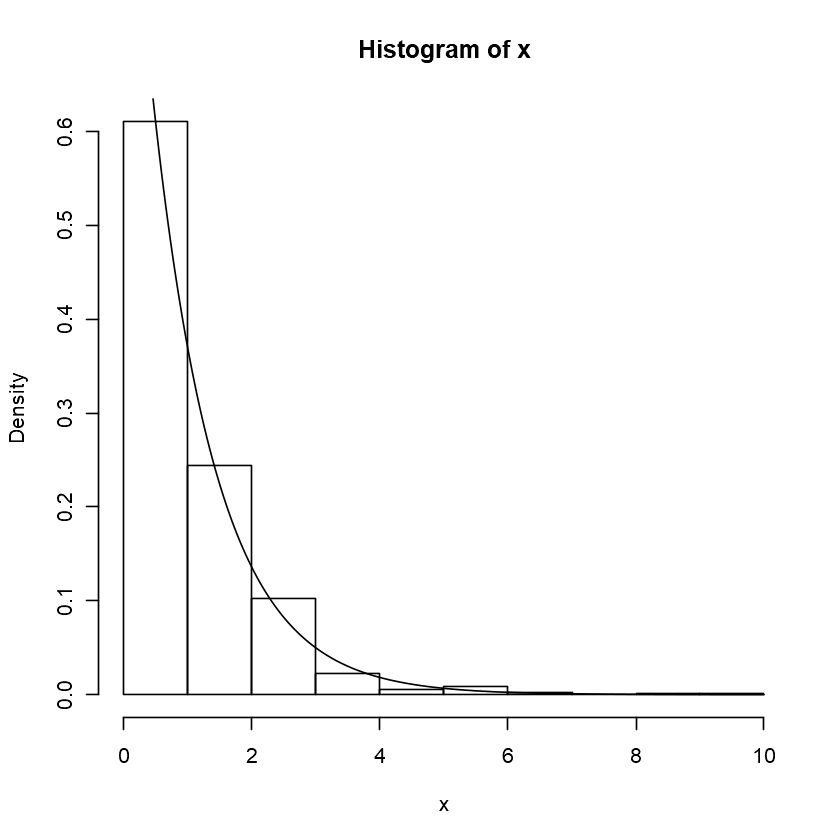

In [2]:
theta=1
x=-1/theta*log(1-runif(n))

##sampling distribution
hist(x,prob=TRUE)

##true distribution
y=seq(0,10,0.01)
lines(y,theta*exp(-theta*y))

<b>$X$가 discrete할 때</b>

$F_{x}^{-1}(u)=x_{i}, F_{x}(x_{i-1})<u\leq F_{x}(x_{i}))$<br>

1) $u^{*}\sim Uniform(0,1)$<br>
2)  $F_{x}^{-1}(u^{*})=x^{*}_{i}$,  $F_{x}(x_{i-1})<u\leq F_{x}(x_{i}))$

<b>예제 1</b><br>
$X\sim Bernoulli(p=0.4)$에서 x를 샘플링하라

$f_{x}(x)=p^{x}(1-p)^{1-x}, x=0,1$<br>
$F_{x}(x)=(1-p)^{1-x}=u ,x=0,1$<br>
=> $x^{*}_{i}, F_{x}(x_{i-1})=0.6<u\leq F_{x}(x_{i})=1$

In [13]:
### Example: discrete case 1
n=1000
p=0.4
u=runif(n)
x=as.integer(u>0.6) #if u>0.6 => 1 o/w 0
mean(x)

[1] 0.392

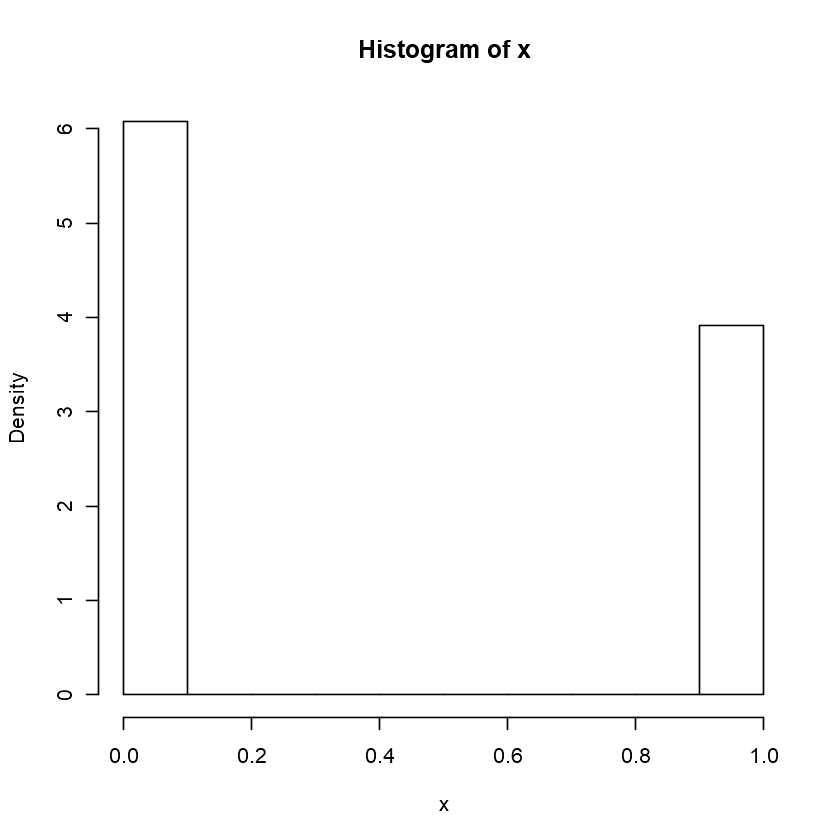

In [14]:
hist(x,prob=TRUE)

<b>예제 2</b><br>
$X\sim Geometric(p=0.4)$에서 x를 샘플링하라

$f_{x}(x)=(1-p)^{x-1}p,x=1,2,...,$<br>
$F_{x}(x)=1-(1-p)^{x}=u$<br>
$F_{x}(u)=\frac{ln(1-u)}{ln(1-p)}  $

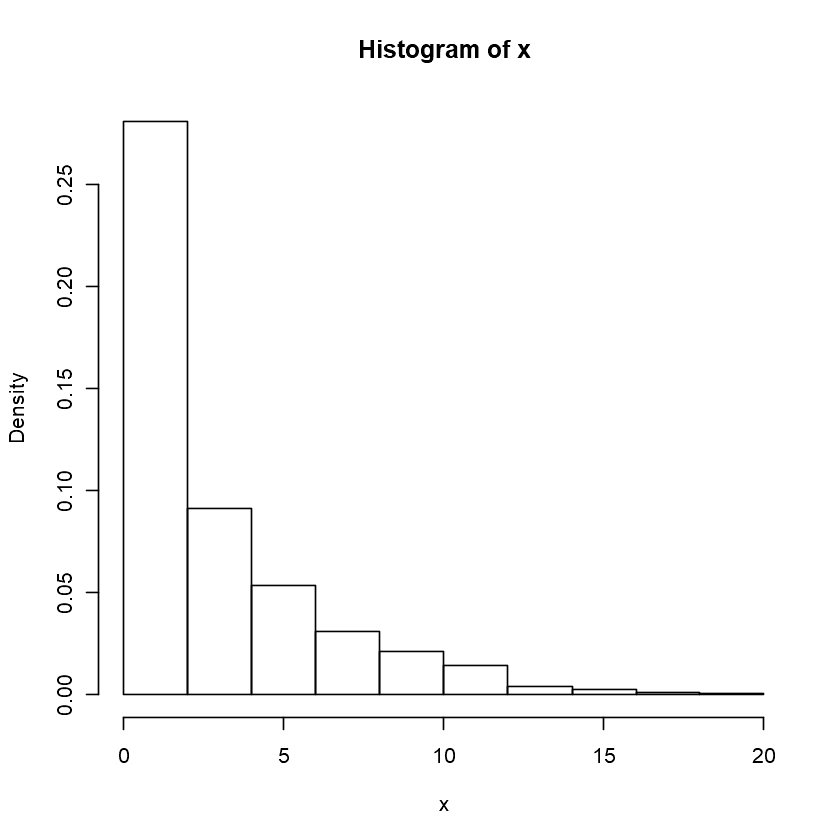

In [15]:
n=1000
p=0.25
u=runif(n)
x=ceiling(log(1-u)/log(1-p))-1

hist(x,prob=TRUE)


<b> Inverse Transformation Method의 문제점 </b><br>
- Cdf의 closed form이 없으면 구할 수 없음
- 가장 대표적인 normal 분포의 cdf 역시 closed form이 없음

출처<br>
Rizzo, M. L. (2007). Statistical computing with R. Chapman and Hall/CRC.